In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
Transformed_data = pd.read_csv("Transformed_Housing_Data2.csv")

In [3]:
Transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [4]:
Transformed_data['Sale_Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [5]:
Transformed_data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
Transformed_data['Mean_Sales'] = Transformed_data['Sale_Price'].mean()
Transformed_data['Mean_Sales']

0        511618.558147
1        511618.558147
2        511618.558147
3        511618.558147
4        511618.558147
             ...      
21604    511618.558147
21605    511618.558147
21606    511618.558147
21607    511618.558147
21608    511618.558147
Name: Mean_Sales, Length: 21609, dtype: float64

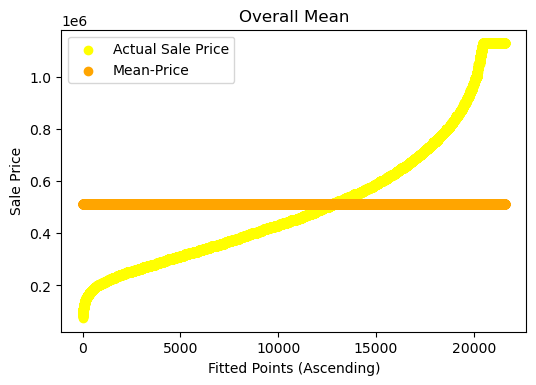

In [7]:
plt.figure(dpi = 100)
k = range(0 , len(Transformed_data))
plt.scatter(k , Transformed_data['Sale_Price'].sort_values() , color = 'yellow', label = 'Actual Sale Price')
plt.scatter(k,Transformed_data['Mean_Sales'].sort_values() , color = 'orange', label = 'Mean-Price')
plt.xlabel("Fitted Points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend()

In [8]:
grades_mean = Transformed_data.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade' , aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
conditional_mean = Transformed_data.pivot_table(values = 'Sale_Price' , columns = 'No of Bedrooms' , aggfunc = np.mean)
conditional_mean

No of Bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
Sale_Price,397113.461538,317052.809045,398325.473722,455923.012725,595408.655428,675841.61524,681622.428044,728726.763158,754946.153846,823858.166667,813191.666667,520000.0,640000.0


In [10]:
#Initializing a new column
Transformed_data['grade_mean'] = 0

#for every grade fill its mean price in new column
for i in grades_mean.columns:
    Transformed_data['grade_mean'][Transformed_data['Overall Grade'] == i] = grades_mean[i][0]
    
Transformed_data['grade_mean'].head()

    

C:\Users\ROHAN\AppData\Local\Temp/ipykernel_16576/2350272053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transformed_data['grade_mean'][Transformed_data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [11]:
#initializing a new column 
Transformed_data['no_of_bedrooms'] = 0

#for every no of bedroom fill its bedroom mean price
for i in conditional_mean.columns:
    Transformed_data['no_of_bedrooms'][Transformed_data['No of Bedrooms'] == i] = conditional_mean[i][0]
    
Transformed_data['no_of_bedrooms']

C:\Users\ROHAN\AppData\Local\Temp/ipykernel_16576/970833000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transformed_data['no_of_bedrooms'][Transformed_data['No of Bedrooms'] == i] = conditional_mean[i][0]


0        455923.012725
1        455923.012725
2        398325.473722
3        595408.655428
4        455923.012725
             ...      
21604    455923.012725
21605    595408.655428
21606    398325.473722
21607    455923.012725
21608    398325.473722
Name: no_of_bedrooms, Length: 21609, dtype: float64

In [12]:
gradewise_list = []
for i in range(1,11):
    k = Transformed_data['Sale_Price'][Transformed_data['Overall Grade'] == i]
    gradewise_list.append(k)                                


In [13]:
classwise_list = []
for i in range (1,11):
    k = Transformed_data['Sale_Price'][Transformed_data['Overall Grade'] == i]
    classwise_list.append(k)

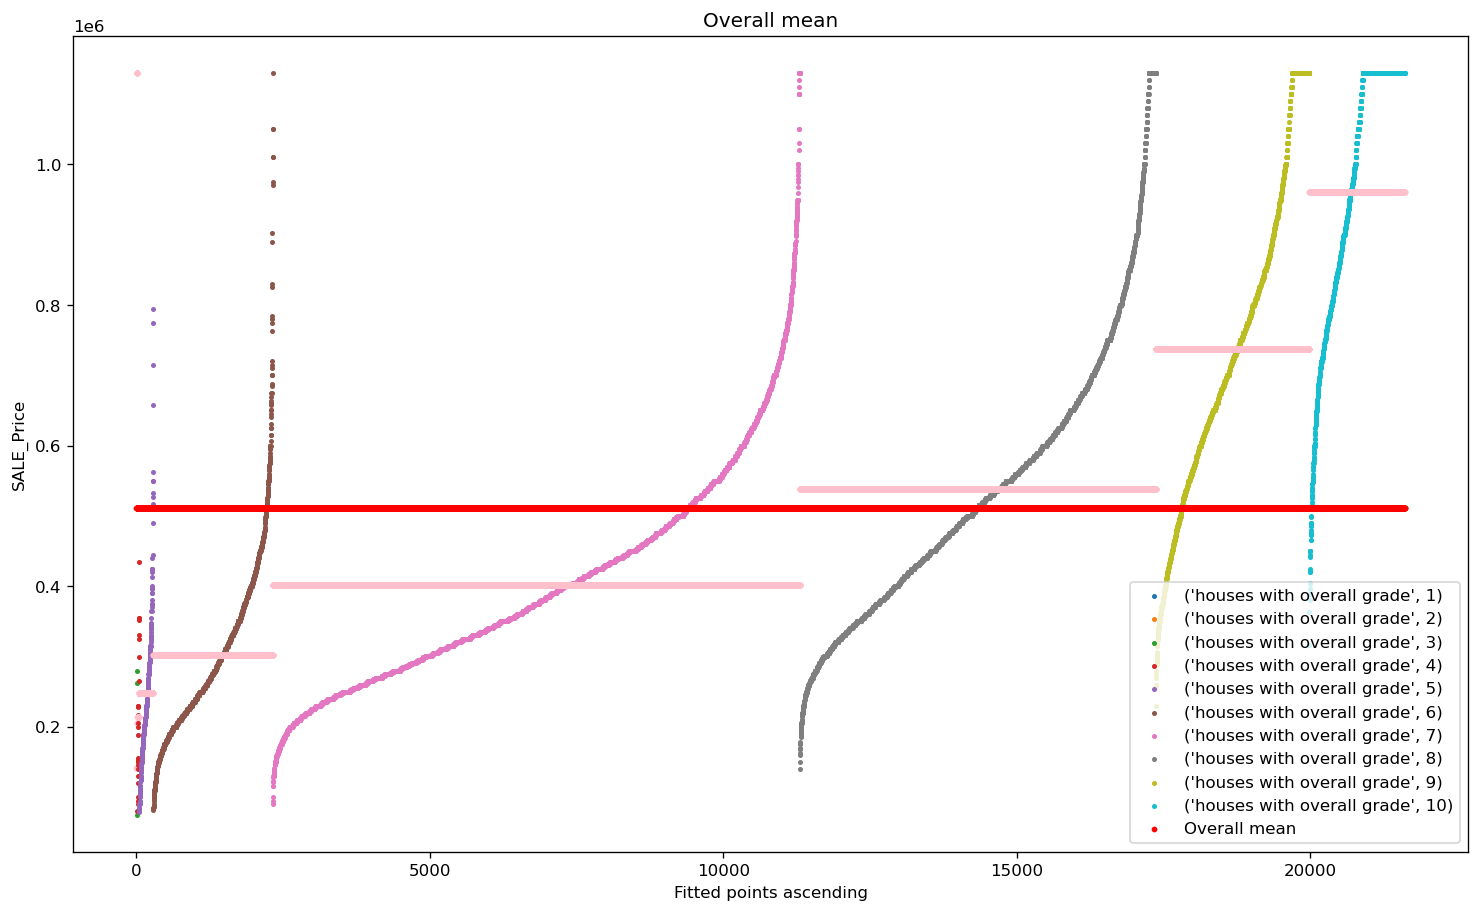

In [14]:
plt.figure(dpi = 120 , figsize = (15,9))

###plotting 'Sale Price' gradewise###
#z variable is for x axis
z = 0 
for i in range(1,11):
    #defining x axis using z
    points = [k for k in range(z,z+ len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points,
               classwise_list[i-1].sort_values(),
               label = ('houses with overall grade' , i) , s = 4)
    #plotting grade wise mean
    plt.scatter(points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
               s=6, color = 'pink'
               )
    z = max(points) + 1
    
###plotting overall mean###
plt.scatter([q for q in range(0,z)],
           Transformed_data['Mean_Sales'],
           color = 'red', 
           label = 'Overall mean' , 
           s=6)
plt.xlabel('Fitted points ascending')
plt.ylabel('SALE_Price')
plt.title('Overall mean')
plt.legend(loc = 4)

<function matplotlib.pyplot.legend(*args, **kwargs)>

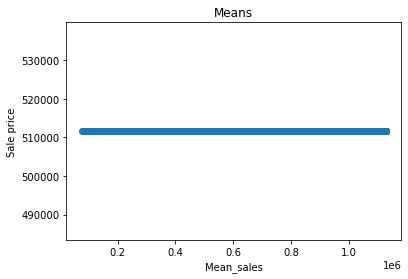

In [15]:
plt.scatter(x = Transformed_data['Sale_Price'] , y = Transformed_data['Mean_Sales'])
plt.xlabel('Mean_sales')
plt.ylabel('Sale price')
plt.title('Means')
plt.legend

In [16]:
mean_difference = Transformed_data['Mean_Sales'] - Transformed_data['Sale_Price']
grade_mean_difference = Transformed_data['grade_mean'] - Transformed_data['Sale_Price']

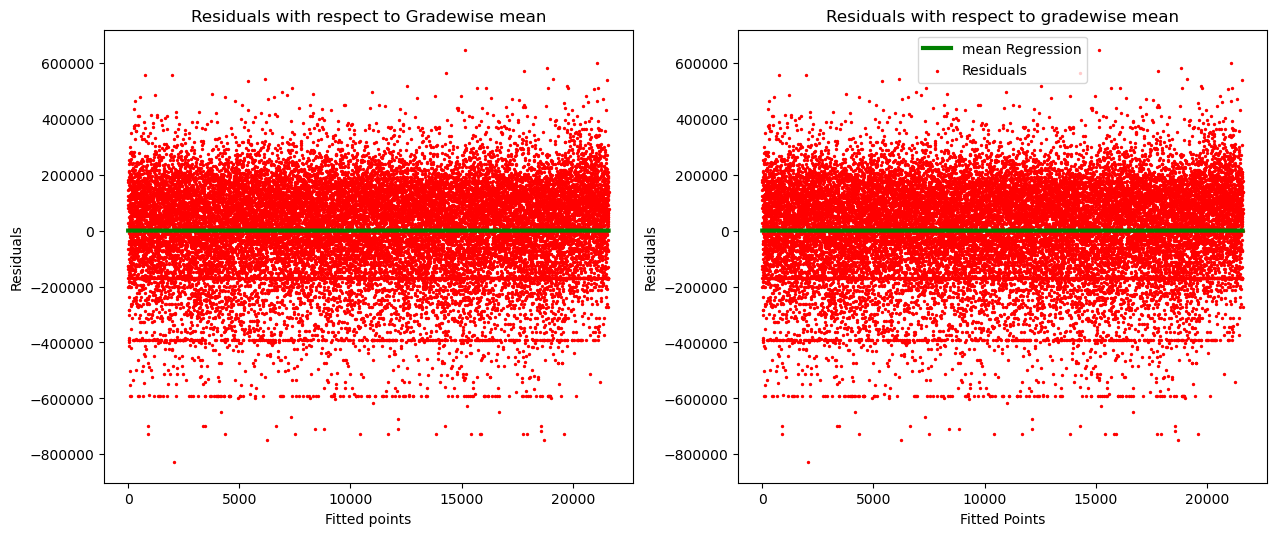

In [17]:
k = range(0,len(Transformed_data))
l = [0 for i in range(len(Transformed_data))]

plt.figure(figsize =(15,6), dpi =100 )

plt.subplot(1,2,1)
plt.scatter(k , grade_mean_difference , color = 'red' , label = 'Residuals' , s = 2)
plt.plot( k , l , color = 'green' , label= 'mean Regreesion' , linewidth = 3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.title("Residuals with respect to Gradewise mean")

plt.subplot(1,2,2)
plt.scatter(k , grade_mean_difference , color = 'red' , label = 'Residuals' , s = 2)
plt.plot(k , l , color = 'green' , label = 'mean Regression' , linewidth = 3)
plt.xlabel("Fitted Points")
plt.ylabel("Residuals")
plt.legend()
plt.title('Residuals with respect to gradewise mean')



plt.legend()

In [24]:
cost = sum(mean_difference)/len(Transformed_data)
print(round(cost,7))

0.0


In [20]:
Y = Transformed_data['Sale_Price']
Y_hat1=Transformed_data['Mean_Sales']
Y_hat2=Transformed_data['grade_mean']
n=len(Transformed_data)

len(Y),len(Y_hat1),len(Y_hat2),n


(21609, 21609, 21609, 21609)

In [21]:
cost_mean = sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [22]:
cost_grade_mean = sum(abs(Y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [26]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

In [27]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)
cost_grade_mean = mean_squared_error(Y_hat2,Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [28]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean=mean_squared_error(Y_hat2,Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)